In [120]:
from PIL import Image
import cv2
import numpy as np
import os
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn
import matplotlib.pyplot as plt
import math


In [121]:
filesPATH = [os.path.join("yalefaces/train", f) for f in os.listdir("yalefaces/train")]
faces = []
ids = []

print("Start reading images")
for file in filesPATH:
    img = Image.open(file).convert("L")
    img_np = np.array(img, "uint8")
    faces.append(img_np)
    ids.append(int(file.split("subject")[1].split(".")[0]))
print("End reading images")

Start reading images
End reading images


In [122]:
lbph_classifier = cv2.face.LBPHFaceRecognizer.create(4, 12, 9, 9)
print("Training...")
lbph_classifier.train(faces, np.array(ids))
print("Training completed")

print("Start writing model to file")
lbph_classifier.write("lbph_classifier.yml")
print("Model saved")

Training...
Training completed
Start writing model to file
Model saved


In [123]:
print("Reading model")
lbph_face_classifier = cv2.face.LBPHFaceRecognizer_create()
lbph_face_classifier.read('lbph_classifier.yml')
print("Model read")

Reading model
Model read


Accuracy: 0.7333333333333333


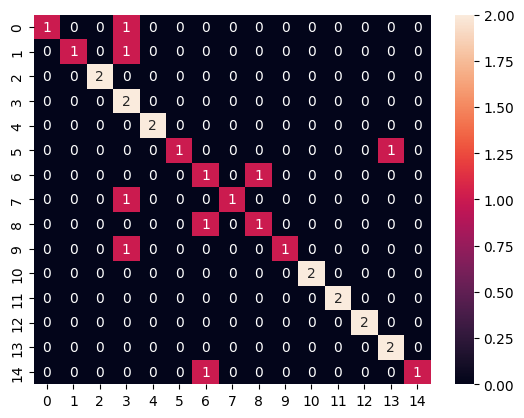

In [124]:
# Test

test_filesPATH = [os.path.join("yalefaces/test", f) for f in os.listdir("yalefaces/test")]

prev = []
expeded = []

for file in test_filesPATH:
    img = Image.open(file).convert("L")
    img_np = np.array(img, "uint8")

    pred, _ = lbph_face_classifier.predict(img_np)
    expected = int(file.split("subject")[1].split(".")[0])

    prev.append(pred)
    expeded.append(expected)

accuracy = accuracy_score(expeded, prev)
print("Accuracy: " + str(accuracy))

seaborn.heatmap(confusion_matrix(expeded, prev), annot=True);
